# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 9.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
404759,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.3760,0.0537,0.0024,0.0293,0,0,0,0
302668,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0586,0.0586,0.0024,0.0928,0,0,0,0
307285,0.0049,0.0024,0.0024,0.0024,0.0024,0.0610,0.0830,0.1172,0.0024,0.0171,0,0,0,0
349602,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0854,0.1147,0.0024,0.0024,1,0,12,0
369219,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0708,0.3418,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(461355, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461355 entries, 0 to 461354
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461355 non-null  float64
 1   Emg2          461355 non-null  float64
 2   Emg3          461355 non-null  float64
 3   Emg4          461355 non-null  float64
 4   Emg5          461355 non-null  float64
 5   Emg6          461355 non-null  float64
 6   Emg7          461355 non-null  float64
 7   Emg8          461355 non-null  float64
 8   Emg9          461355 non-null  float64
 9   Emg10         461355 non-null  float64
 10  repetition    461355 non-null  int64  
 11  rerepetition  461355 non-null  int64  
 12  stimulus      461355 non-null  int64  
 13  restimulus    461355 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000
mean,0.012592,0.063858,0.083643,0.019420,0.009869,0.067976,0.379264,0.189232,0.147708,0.108196,3.196580,2.265201,5.664542,4.039941
std,0.020043,0.171862,0.236912,0.058591,0.036540,0.169753,0.571609,0.326014,0.387663,0.189839,3.486926,3.265661,6.587632,6.156426
min,0.002400,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.068400,0.041500,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.002400,0.002400,0.002400,0.026900,0.153800,0.083000,0.002400,0.031700,2.000000,0.000000,3.000000,0.000000
75%,0.019500,0.039100,0.041500,0.002400,0.002400,0.080600,0.444300,0.180700,0.073200,0.139200,6.000000,4.000000,10.000000,7.000000
max,1.301300,3.315400,4.660600,1.555200,1.225600,4.665500,4.665500,4.665500,4.663100,4.111300,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193240
7      15521
4      15516
12     15515
2      15505
8      15498
6      15464
9      15458
11     15453
5      15451
10     15437
3      15432
1      15428
14     10339
13     10322
17     10322
15     10297
16     10266
18      5169
21      5166
19      5164
20      5134
22      5133
23      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

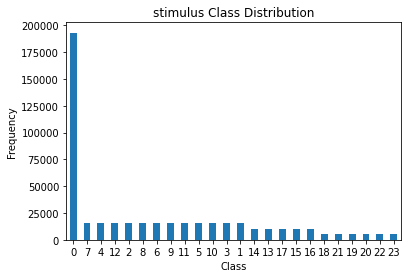

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
158983,0.0195,0.0024,0.0024,0.0024,0.0024,0.0024,0.1904,0.0024,0.0024,0.0024,0,0,0,0
331131,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0024,0.0024,0.0098,0,0,0,0
47920,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
338579,0.0049,0.0024,0.0293,0.0269,0.0024,0.1099,0.4834,0.1074,0.1245,0.1050,9,9,10,10
21385,0.0073,0.0024,0.0024,0.0024,0.0024,0.0122,0.2246,0.0537,0.1221,0.0073,6,6,3,3


In [12]:
raw_data.shape

(377804, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377804 entries, 0 to 461354
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          377804 non-null  float64
 1   Emg2          377804 non-null  float64
 2   Emg3          377804 non-null  float64
 3   Emg4          377804 non-null  float64
 4   Emg5          377804 non-null  float64
 5   Emg6          377804 non-null  float64
 6   Emg7          377804 non-null  float64
 7   Emg8          377804 non-null  float64
 8   Emg9          377804 non-null  float64
 9   Emg10         377804 non-null  float64
 10  repetition    377804 non-null  int64  
 11  rerepetition  377804 non-null  int64  
 12  stimulus      377804 non-null  int64  
 13  restimulus    377804 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.2 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 85.02005002580695


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     37852
           1       0.83      0.83      0.83      2147
           2       0.79      0.78      0.79      2223
           3       0.70      0.70      0.70      2239
           4       0.78      0.80      0.79      2138
           5       0.71      0.70      0.70      2250
           6       0.82      0.83      0.83      2274
           7       0.68      0.70      0.69      1844
           8       0.72      0.73      0.73      2300
           9       0.82      0.83      0.82      1903
          10       0.75      0.76      0.76      2427
          11       0.75      0.73      0.74      2212
          12       0.80      0.82      0.81      1986
          13       0.78      0.77      0.78      1466
          14       0.87      0.86      0.87      1275
          15       0.75      0.75      0.75      1474
          16       0.83      0.83      0.83      1566
 

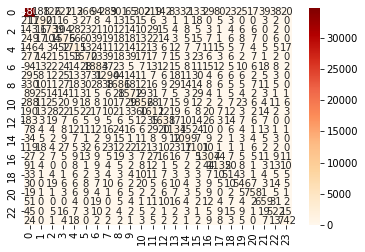

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0564312277497652
MSE: 11.316724236047696
RMSE: 3.3640339231416343


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.8506195168562334
Recall Score :  0.8502005002580696
f1_score :  0.8503727693472081
